# Analysis of App Store¶

### Content

+ Introduction: App Store

+ Data description

+ Research questions

+ Data preparation

+ EDA and Visualisation

+ Conclusion


## 1. Introduction: App Store



The App Store is a digital distribution platform, developed and supported by Apple Inc., for mobile applications on its iOS & iPadOS operating systems. The store allows users to browse and download apps developed with Apple's iOS software development kit.

The App Store was created on July 10, 2008, with an available 500 applications. The number of apps peaked at about 2.2 million in 2017, but decreased slightly over the next few years as Apple began the process of removing older apps that do not work properly or don't meet current app guidelines. 

As we know, App Store has good paid applications as well as free apps. Many of them are helpful and people download in spite of they are not free.

This dataset contains more than 7000 Apple iOS mobile application details. The data was extracted from the iTunes Search API at the Apple Inc website in 2017. But I took ready dataset from the kaggle to do my analysis.

Source(https://en.wikipedia.org/wiki/App_Store_(iOS/iPadOS))

## 2. Data description

Based on description of App Store above, we see that in 2017 was a peak of amount of applications in the store. After that, by analyzing them, Apple started to filter and cleaning the App Store. In the dataset we will cover small part of them and analyze.

This analysis will be built on data of 2017. Below is data that we will use for our analysis:

- id - position in the list
- track_name - name of the application
- size_bytes - size of the application
- price - price of the application
- user_rating - average user rating value 
- prime_genre - genre of the application
- lang.num - number of supported languages


## 3. Research questions

For this project, data analysis and visualization contains 6 parts:

1. Analyze price of applications.
2. Analyze size to see heavy applications.
3. Analyze genre to group applications.
4. Analyze rating of applications.
5. Analyze number of languages to show applications that support many languages.

## 4. Data preparation

In [2]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [3]:
#read the dataset as a dataframe
as_file = pd.read_csv('AppleStore.csv')

In [4]:
#return the dataframe
as_file.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
as_file.shape

(7197, 17)

We see that the dataset consists of 7197 rows and 17 columns.

In [6]:
as_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


We see that the dataset has no missing values.

In [7]:
as_file.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

We have checked up that there is exactly no missing values.

In [8]:
#sum of duplicated data
as_file.duplicated().sum()

0

We can see that the dataset does not have duplicated data.

In [9]:
#drop extra columns of the dataframe
as_file.drop(['Unnamed: 0', 'currency', 'rating_count_tot' , 'rating_count_ver' , 'user_rating_ver', 'ver', 'cont_rating', 'sup_devices.num', 'ipadSc_urls.num', 'vpp_lic'], axis='columns', inplace=True)

Now we have dropped some useless columns such as, 'Unnamed: 0', 'currency', 'rating_count_tot', 'rating_count_ver', 'user_rating_ver', 'ver', 'cont_rating', 'sup_devices.num', 'ipadSc_urls.num', 'vpp_lic'.

In [10]:
#return clear dataframe

as_file.head()

,id,track_name,size_bytes,price,user_rating,prime_genre,lang.num
0,281656475,PAC-MAN Premium,100788224,3.99,4.0,Games,10
1,281796108,Evernote - stay organized,158578688,0.00,4.0,Productivity,23
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,3.5,Weather,3
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,4.0,Shopping,9
4,282935706,Bible,92774400,0.00,4.5,Reference,45


We can see that there are left only 7 columns with useful data.

In [11]:
as_file.shape

(7197, 7)

And the dataset consists of 7197 rows and 7 columns as well.

In [12]:
as_file2 = as_file.rename(columns = {"track_name": "name",
                                    "size_bytes": "size",
                                    "user_rating": "rating",
                                    "prime_genre": "genre",
                                    "lang.num": "lang_num"}) #rename some columns

as_file2.head()

,id,name,size,price,rating,genre,lang_num
0,281656475,PAC-MAN Premium,100788224,3.99,4.0,Games,10
1,281796108,Evernote - stay organized,158578688,0.00,4.0,Productivity,23
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,3.5,Weather,3
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,4.0,Shopping,9
4,282935706,Bible,92774400,0.00,4.5,Reference,45


Now we have changed names of some columns to more understanding.

In [13]:
as_file2["price_category"] = "" #create empty column

as_file2.head()

,id,name,size,price,rating,genre,lang_num,price_category
0,281656475,PAC-MAN Premium,100788224,3.99,4.0,Games,10,
1,281796108,Evernote - stay organized,158578688,0.00,4.0,Productivity,23,
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,3.5,Weather,3,
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,4.0,Shopping,9,
4,282935706,Bible,92774400,0.00,4.5,Reference,45,


We have added new column "price_category".

In [14]:
for p in range(len(as_file2["price"])): #run through the price
    
    if (as_file2["price"][p] == 0.00): #comparing the value of price
        as_file2.loc[[p],"price_category"] = 'free'; #giving the new value for price_category        
    elif (0.00 < as_file2["price"][p] and as_file2["price"][p] <= 10.00):
        as_file2.loc[[p],"price_category"] = 'cheap';
    elif (10.00 < as_file2["price"][p] and as_file2["price"][p] <= 25.00):
        as_file2.loc[[p],"price_category"] = 'medium';
    else:
        as_file2.loc[[p],"price_category"] = 'expensive';
        
as_file2.head()

,id,name,size,price,rating,genre,lang_num,price_category
0,281656475,PAC-MAN Premium,100788224,3.99,4.0,Games,10,cheap
1,281796108,Evernote - stay organized,158578688,0.00,4.0,Productivity,23,free
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,3.5,Weather,3,free
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,4.0,Shopping,9,free
4,282935706,Bible,92774400,0.00,4.5,Reference,45,free


We have inserted data into "price_category" column by dividing prices to 4 categories, such as, free, cheap, medium and expensive.

In [15]:
as_file2.shape

(7197, 8)

The shape was changed from 7 columns to 8 columns as well.

In [16]:
as_file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              7197 non-null   int64  
 1   name            7197 non-null   object 
 2   size            7197 non-null   int64  
 3   price           7197 non-null   float64
 4   rating          7197 non-null   float64
 5   genre           7197 non-null   object 
 6   lang_num        7197 non-null   int64  
 7   price_category  7197 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 449.9+ KB


We see that the type of our new column "price_category" is object.

## 5. EDA and Visualisation

In this part we will answer to the research questions by visualization.

### 5.1 Analyze price of applications.

In [17]:
#apply the theme
sns.set_theme(style="whitegrid")

In [18]:
as_file2["price_category"].value_counts()

free         4056
cheap        3044
medium         76
expensive      21
Name: price_category, dtype: int64

Now we see how many applications are in each category.

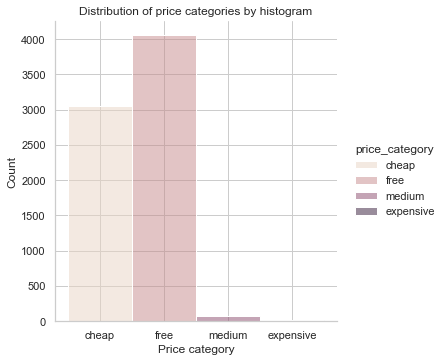

In [19]:
ax = sns.displot(data=as_file2,
            x="price_category",
            hue="price_category",
            binwidth=4,
            palette="ch:.19"
           ).set(title='Distribution of price categories by histogram')
ax.set_axis_labels("Price category", "Count");

In this histogram we see that most of the applications are free and only few of them are expensive.

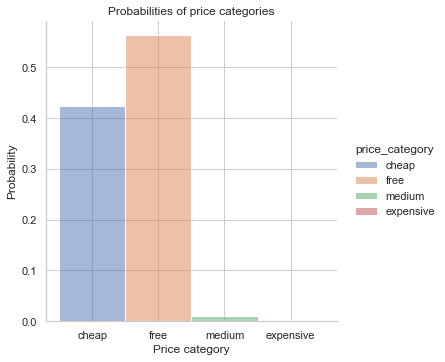

In [20]:
ax = sns.displot(data=as_file2, 
            x="price_category", 
            hue="price_category", 
            stat="probability"
           ).set(title='Probabilities of price categories')
ax.set_axis_labels("Price category", "Probability");

In [21]:
c1 = as_file2["price"].where(as_file2["price_category"]=='free') #finding price which category is free
c2 = as_file2["price"].where(as_file2["price_category"]=='cheap') #finding price which category is cheap                                              
c3 = as_file2["price"].where(as_file2["price_category"]=='medium') #finding price which category is medium                                               
c4 = as_file2["price"].where(as_file2["price_category"]=='expensive') #finding price which category is expensive

I have divided prices by categories.

In [22]:
print(c1.count()/as_file2["price"].count()*100) #calculating the percentage of free apps

56.35681533972489


Wee see that 56.36% of all applications are free.

In [23]:
print(c2.count()/as_file2["price"].count()*100) #calculating the percentage of cheap apps

42.29540086147006


Wee see that 42.29% of all applications are cheap.

In [24]:
print(c3.count()/as_file2["price"].count()*100) #calculating the percentage of medium apps

1.0559955537029317


Wee see that 1.06% of all applications are medium.

In [25]:
print(c4.count()/as_file2["price"].count()*100) #calculating the percentage of expensive apps

0.29178824510212586


Wee see that 0.29% of all applications are expensive.

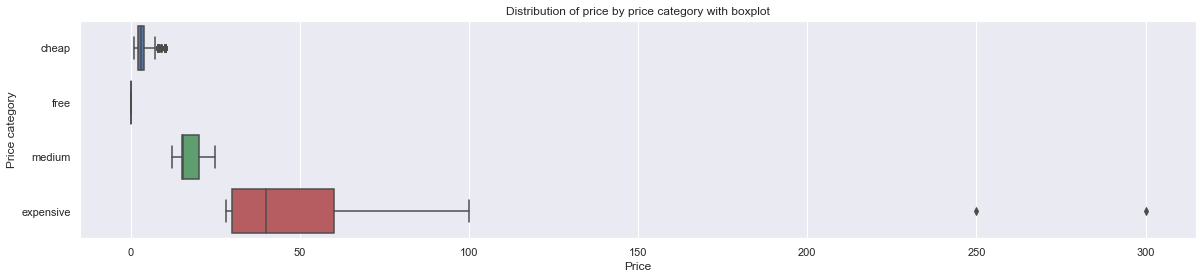

In [26]:
sns.set(rc={'figure.figsize':(20,4)}) #giving the size for figure

ax = sns.boxplot(data=as_file2, #create the boxplot
            x="price",
            y="price_category"
           ).set(title='Distribution of price by price category with boxplot', xlabel="Price", ylabel="Price category")

In the boxplot we can see that category "cheap" has some outliers around 6-12, "expensive" has 2 outliers on 249.99 and 299.99, and it skewed to the right side. "free" does not has an outlier, wiskers, mean and mode, they are equal to 0. 

## 5.2 Analyze size to see heavy applications.

We will analyze size of applications

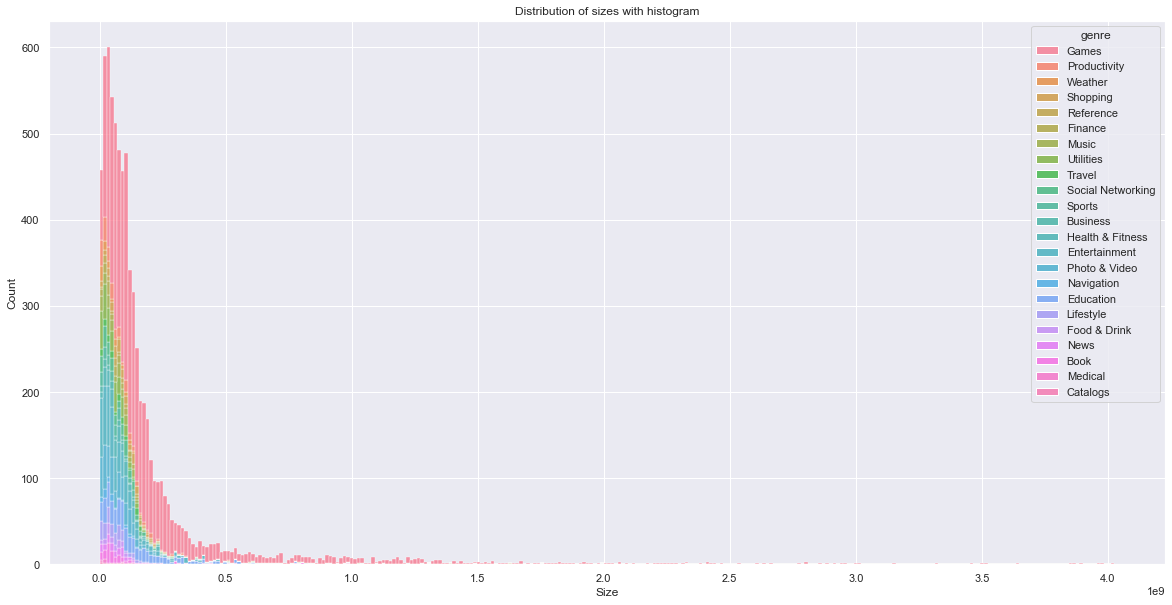

In [27]:
sns.set(rc={'figure.figsize':(20,10)}) #giving the size for figure

ax = sns.histplot(data=as_file2, #create the histogram
            x="size", 
            multiple="stack",
            hue="genre"
           ).set(title='Distribution of sizes with histogram', xlabel="Size", ylabel="Count")

In that case we can understand that the size of many applications is around 0 and 0.5 * 10^9 Bytes. The  quantity of heavy applications is almost 10-20, while the amount of light applications is bitty over 600.

In [28]:
max(as_file2["size"])

4025969664

In [29]:
min(as_file2["size"])

589824

We found out the maximum and minimum sizes

In [30]:
s1 = as_file2["size"].where(as_file2["size"]<=500000000) #finding the size which is less than 500000000
s1.count()

6596

In [31]:
s2 = as_file2["size"].where((500000000<as_file2["size"]) & (as_file2["size"]<=2500000000)) #finding the size which is between 500000000 and 2500000000
s2.count()

568

In [32]:
s3 = as_file2["size"].where(2500000000<as_file2["size"]) #finding the size which is bigger than 2500000000
s3.count()

33

We have found the total number of definite genres by sizes.

In [33]:
h = as_file2.sort_values(by='size', ascending=False).head(33) #creating a new dataframe with 33 observations of applications with big size
h

,id,name,size,price,rating,genre,lang_num,price_category
5989,1106831630,ROME: Total War,4025969664,9.99,4.5,Games,6,cheap
6772,1146713881,パチスロ ガールズ＆パンツァー,3975609344,9.99,0.0,Games,1,cheap
6677,1141253112,戦国乙女2～深淵に輝く気高き将星～,3968637952,7.99,0.0,Games,1,cheap
4673,1055962232,デビルサバイバー２ 最後の７日間,3956326400,7.99,0.0,Games,1,cheap
6017,1108475553,Jade Empire™: Special Edition,3896109056,9.99,4.5,Games,10,cheap
4387,1041260001,FINAL FANTASY Ⅸ,3860406272,20.99,4.5,Games,5,medium
5648,1091640857,"That Dragon, Cancer",3856588800,4.99,4.5,Games,1,cheap
2135,687888390,République,3646993408,1.99,4.5,Games,1,cheap
3604,978524071,Grim Fandango Remastered,3521220608,4.99,4.0,Games,6,cheap
2688,881270303,XCOM®: Enemy Within,3508826112,9.99,4.0,Games,9,cheap


This is a database for 33 heavy applications in descending order.

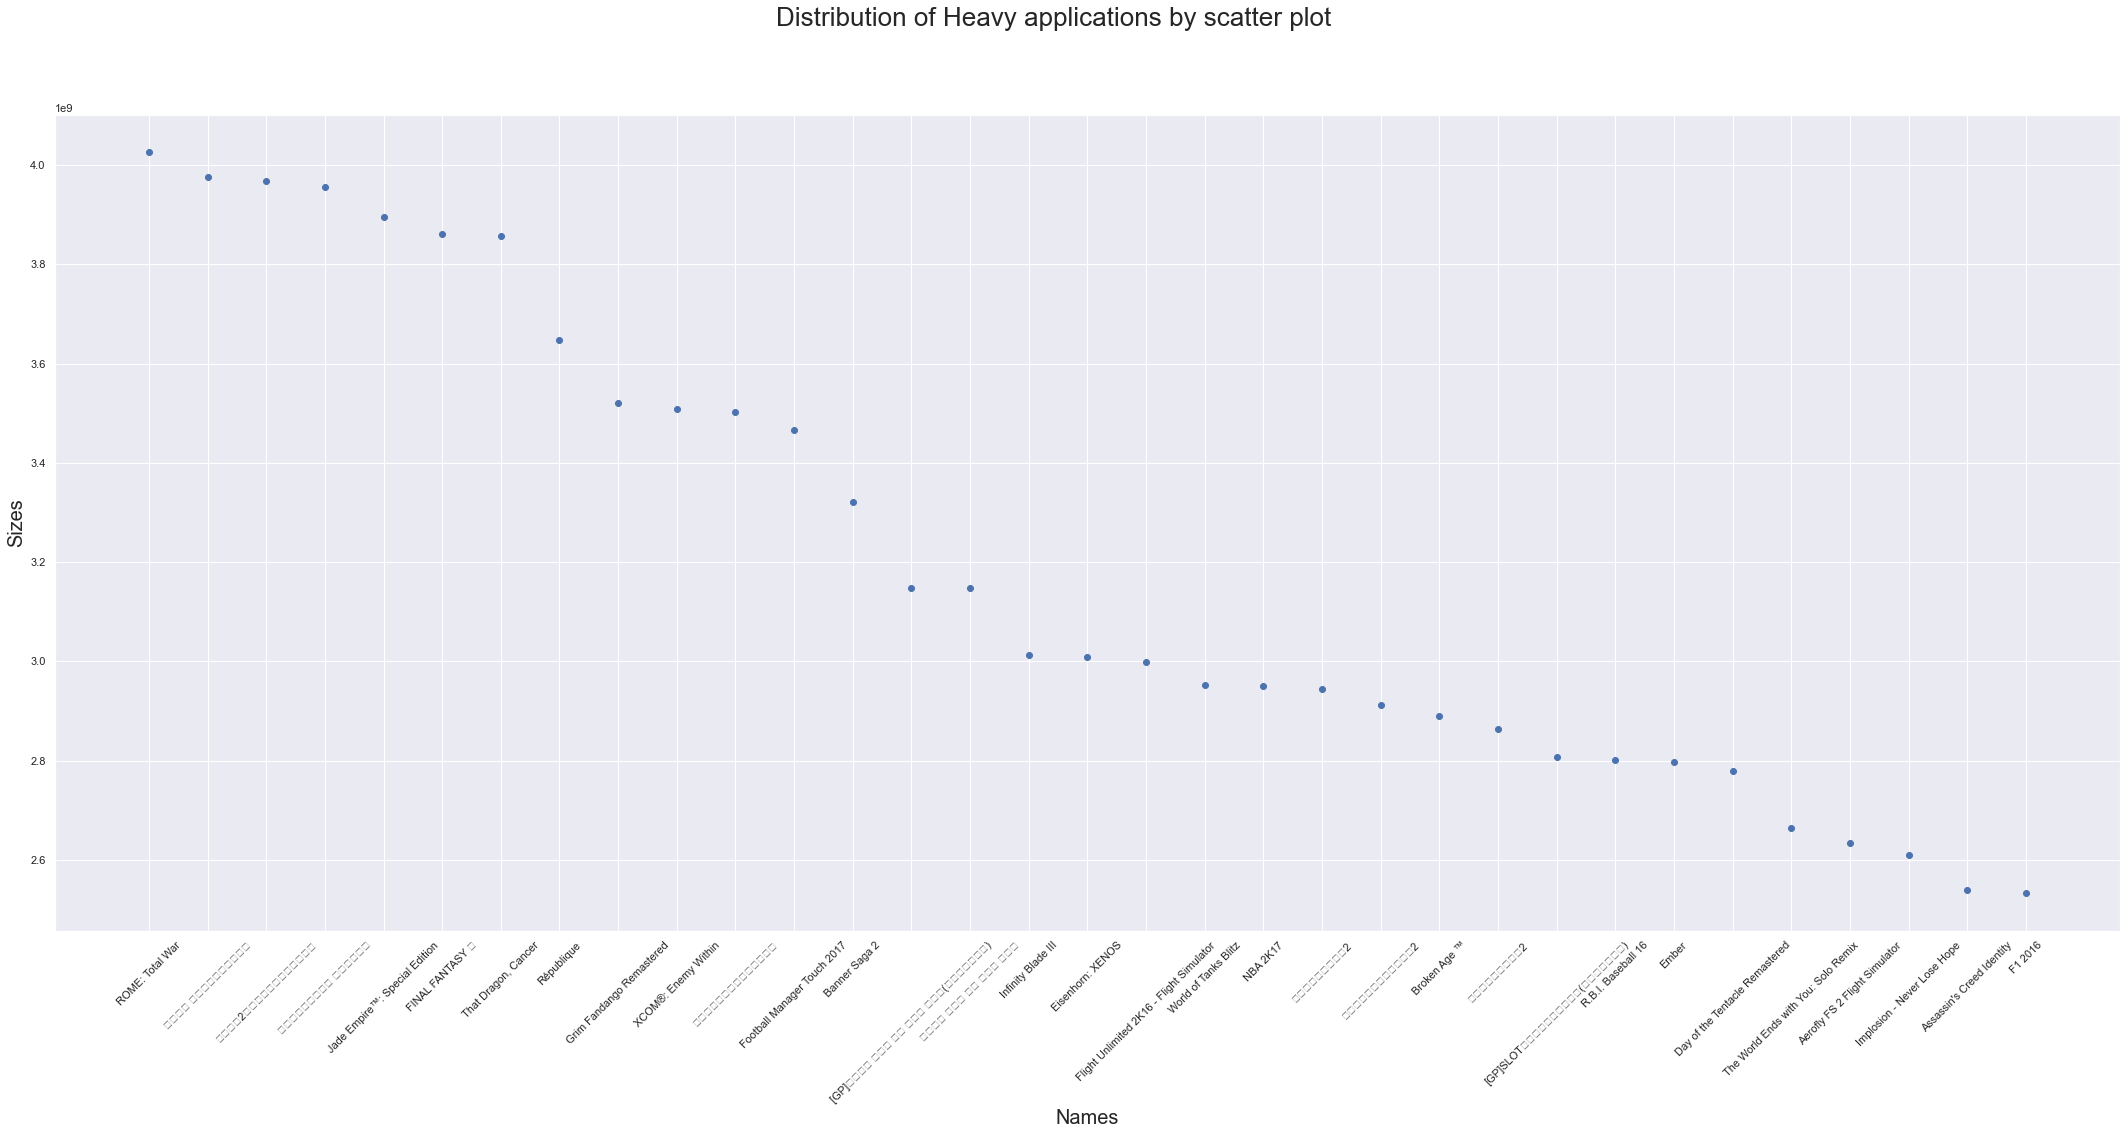

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(37, 15)) #giving the size for figue

names = h["name"];
size = h["size"];

plt.scatter(x=names, y=size) #creating the scatter plot
plt.xticks(rotation=45)
plt.suptitle('Distribution of Heavy applications by scatter plot', size=26)
plt.xlabel("Names", size=20)
plt.ylabel("Sizes", size=20)

plt.show()

Now we can see the illustration of heavy applications by using scatter plot. But we can not see names in the graph properly because of they are written in hieroglyphs, and we can read names in the table above.

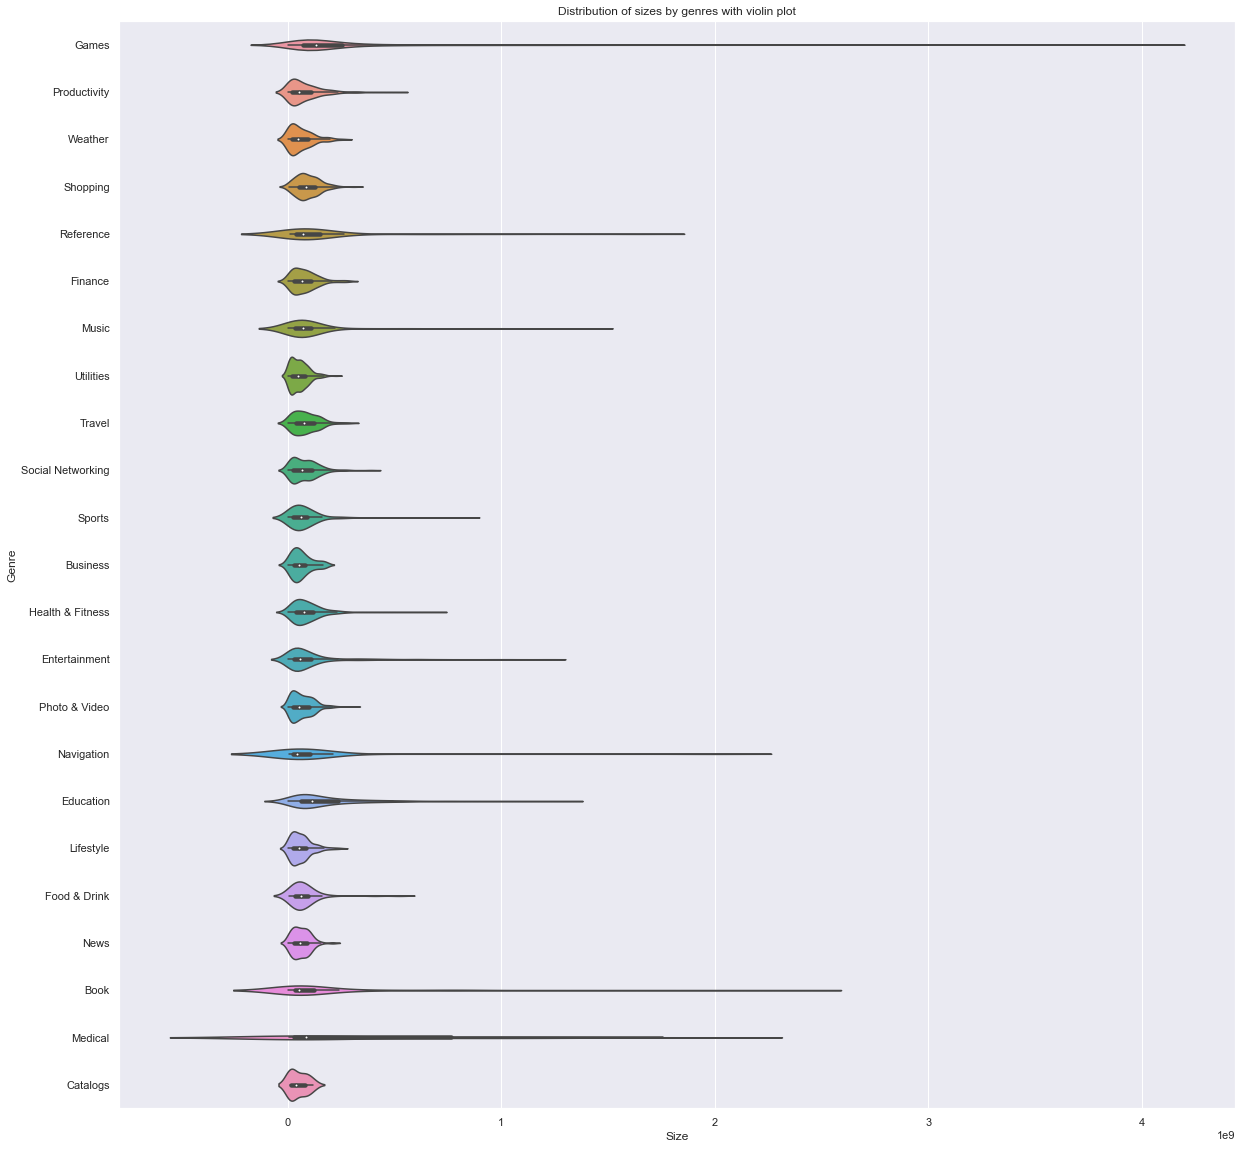

In [36]:
sns.set(rc={'figure.figsize':(20,20)}) #giving the size for figue

ax = sns.violinplot(data=as_file2, #creating the violin plot
            x="size", 
            y="genre"
           ).set(title='Distribution of sizes by genres with violin plot', xlabel="Size", ylabel="Genre")

The violin plot illustrates that the size of many applications is around 0 and 0.3 * 10^9 bytes.

## 5.3 Analyze genre to group applications.

In [37]:
genre_num = as_file2["genre"].value_counts().index
genre_num

Index(['Games', 'Entertainment', 'Education', 'Photo & Video', 'Utilities',
       'Health & Fitness', 'Productivity', 'Social Networking', 'Lifestyle',
       'Music', 'Shopping', 'Sports', 'Book', 'Finance', 'Travel', 'News',
       'Weather', 'Reference', 'Food & Drink', 'Business', 'Navigation',
       'Medical', 'Catalogs'],
      dtype='object')

In [38]:
counter = 0; #counting total number of genres
for g in genre_num:
    counter+=1;
print(counter)

23


Now we know how many genres the dataset contains.

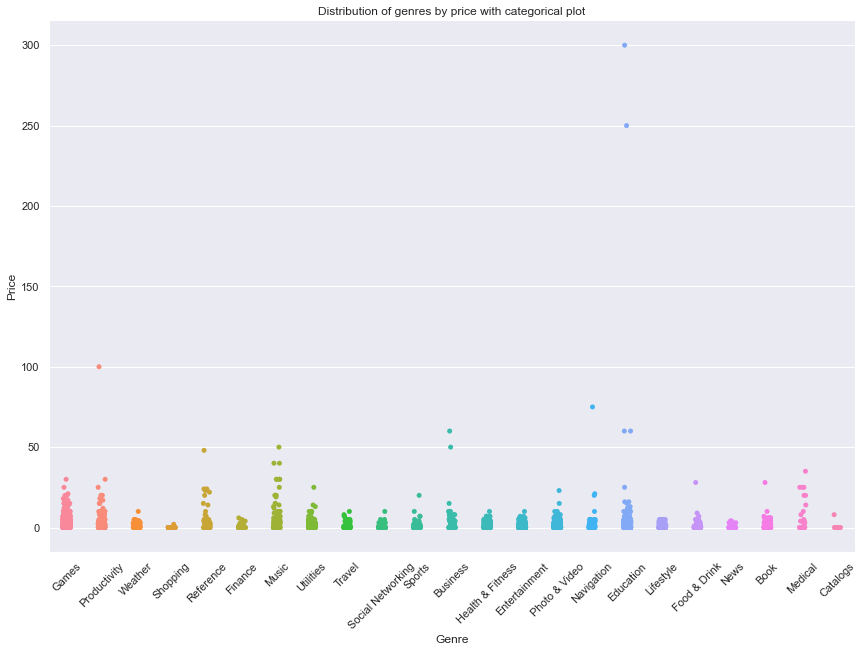

In [39]:
ax = sns.catplot(data=as_file2, #creating the categorical plot
            x="genre", 
            y="price", 
            kind="strip",
            height=8, 
            aspect=1.5
           ).set(title='Distribution of genres by price with categorical plot', xlabel="Genre", ylabel="Price")
ax.set_xticklabels(rotation=45)

In this categorical plot above we can see that only several types of genres have prices which is under 25.00. The most expensive prices 249.99 and 299.99 are on education.

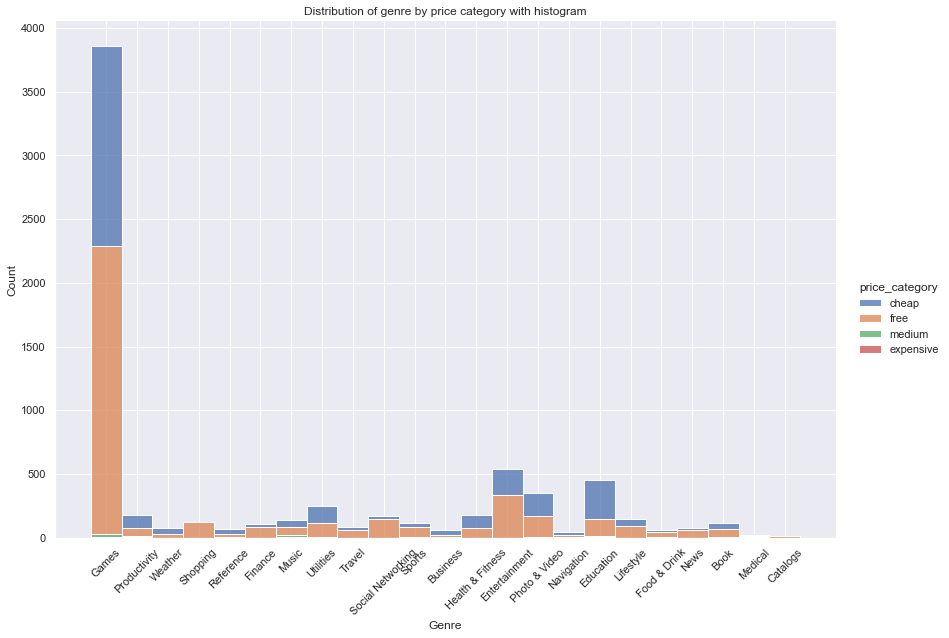

In [40]:
ax = sns.displot(data=as_file2, #creating the histogram
            x='genre',  
            hue='price_category', 
            multiple="stack",
            height=8, 
            aspect=1.5
           ).set(title='Distribution of genre by price category with histogram', xlabel="Genre", ylabel="Count")
ax.set_xticklabels(rotation=45)

This histogram shows us that all of genres have free apps and cheap except shopping and catalogs. Because of medium and expensive categories are few, we can not see them in the graph above.

In [41]:
medical = as_file2["price_category"].where(as_file2["genre"]=='Medical') #finding the size which is bigger than 2500000000
medical.value_counts()

free         8
cheap        8
medium       6
expensive    1
Name: price_category, dtype: int64

Since the illustration of "Medical" genre is white, I have decided to show price categories of that to clarify the quantity of each them.

In [42]:
genre_v = as_file2["genre"].value_counts()
genre_v

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: genre, dtype: int64

Now we know the total numbers of each genre.

In [43]:
genre_h = h["genre"].value_counts()
genre_h

Games    33
Name: genre, dtype: int64

Now we know that the genre of heavy applications' dataset is "Games" and their total number is 33.

In [44]:
(h["genre"].count()/as_file2["genre"].count())*100

0.45852438516048355

In [45]:
(h["genre"].count()/as_file2["genre"].where(as_file2["genre"]=='Games').count())*100

0.8544795442775763

In the first ratio we see the percentage of heavy apps in the whole dataset.

In the second ratio we see the percentage of heavy apps in the whole games genre.

## 5.4 Analyze rating of applications.

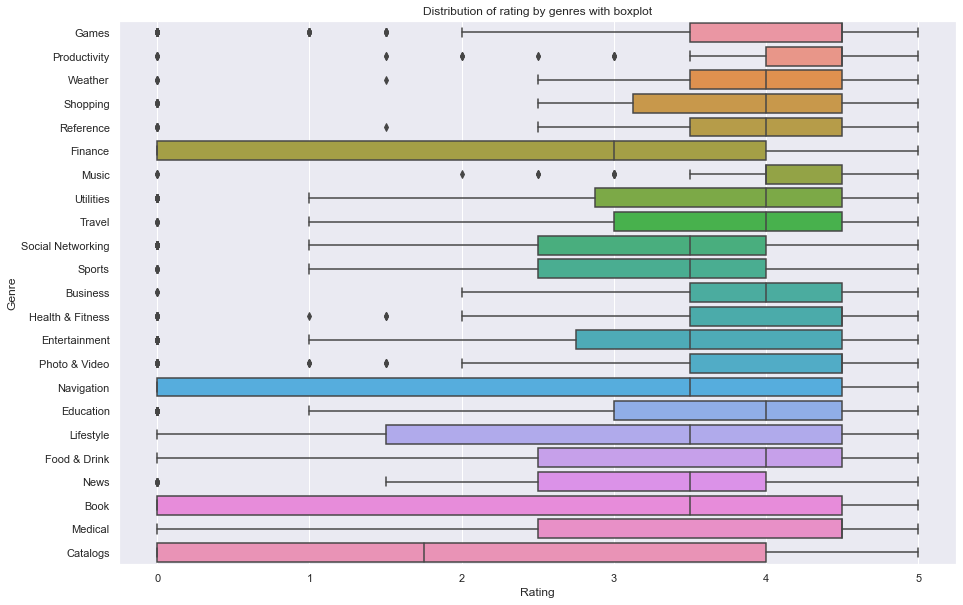

In [46]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.boxplot(data=as_file2, #creating the boxplot
            x="rating",
            y="genre"
           ).set(title='Distribution of rating by genres with boxplot', xlabel="Rating", ylabel="Genre")

The boxplot above illustrates us that a lot of genres have outlier in a range between 0 and 3. It says that many of them has good reviews and comments.

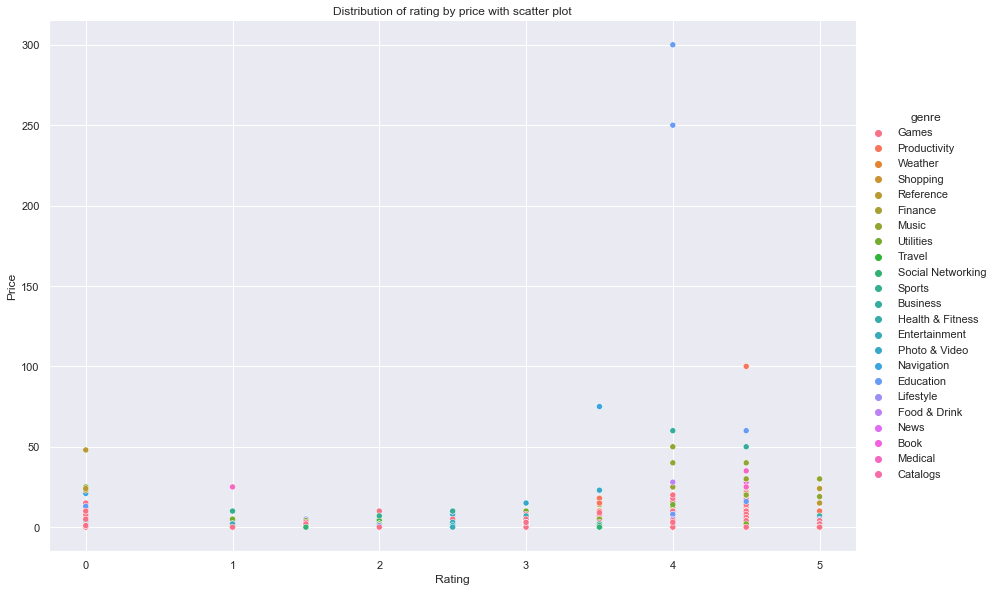

In [47]:
ax = sns.relplot(data=as_file2, #creating the scatter plot
            x='rating', 
            y='price', 
            kind='scatter', 
            hue='genre', 
            height=8, 
            aspect=1.5
           ).set(title='Distribution of rating by price with scatter plot', xlabel="Rating", ylabel="Price")

In this scatter plot we can see that the rating of many expensive and medium price appications is between 3 and 5, while cheap and free apps have rating in a range between 0 and 5. Therefore we can understand that expensive apps are mostly useful and have good user reviews. 

## 5.5 Analyze number of languages to show applications that support many languages.

In [48]:
max(as_file2["lang_num"])

75

In [49]:
min(as_file2["lang_num"])

0

We found out the maximum and minimum number of languages which are used in one application.

In [50]:
l1 = as_file2["name"].where(as_file2["lang_num"]==75)
l1.count()

1

In [51]:
l2 = as_file2["name"].where(as_file2["lang_num"]==0)
l2.count()

41

Now we know how many applications support 75 and 0 languages.

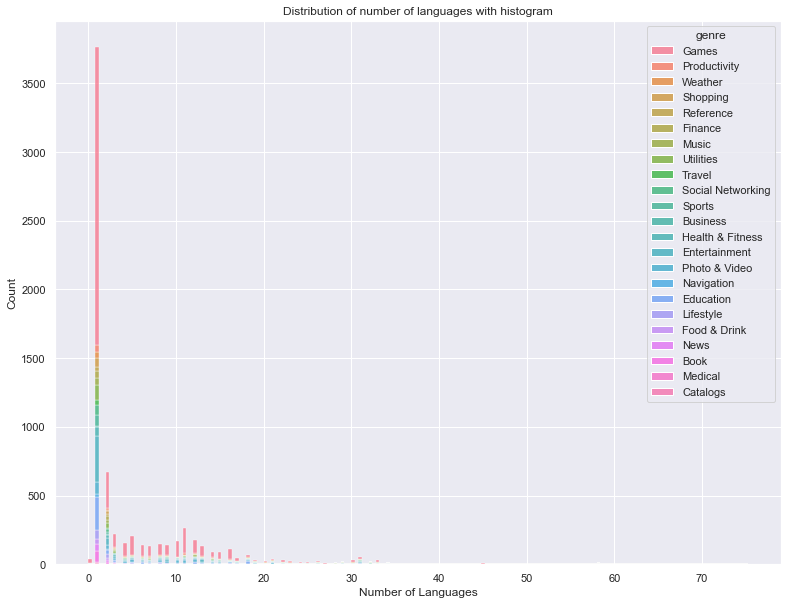

In [52]:
sns.set(rc={'figure.figsize':(13,10)}) #giving the size for figure

ax = sns.histplot(data=as_file2, #create the histogram
            x="lang_num", 
            multiple="stack",
            binwidth=.4,
            hue="genre"
           ).set(title='Distribution of number of languages with histogram', xlabel="Number of Languages", ylabel="Count")

The histogram shows us the total number of applications for each number of languages.

In [53]:
lang1 = as_file2["name"].where(as_file2["lang_num"]<=40)
lang1.count()

7150

In [54]:
lang2 = as_file2["name"].where(as_file2["lang_num"]>40)
lang2.count()

47

I have divided applications by supporting number of languages into 2 groups.

In [55]:
lang_max = as_file2.sort_values(by='lang_num', ascending=False).head(47) #creating a new dataframe with applications that support many languages
lang_max

,id,name,size,price,rating,genre,lang_num,price_category
3414,962194608,Google Photos - unlimited photo and video storage,160215040,0.00,5.0,Photo & Video,75,free
5780,1096918571,Google Duo - simple video calling,44514304,0.00,4.0,Social Networking,74,free
2676,879478102,Google Slides,249625600,0.00,4.0,Productivity,69,free
2550,842842640,Google Docs,199993344,0.00,4.5,Productivity,69,free
2551,842849113,Google Sheets,292418560,0.00,4.5,Productivity,69,free
5777,1096801294,Google Allo — smart messaging,171962368,0.00,3.5,Social Networking,68,free
2863,905060486,Inbox by Gmail,219122688,0.00,4.5,Productivity,63,free
681,414706506,Google Translate,65281024,0.00,3.5,Reference,59,free
6392,1126517945,Space by Tinybop,332977152,2.99,4.5,Education,58,cheap
3141,936966605,The Robot Factory by Tinybop,298121216,0.00,4.0,Education,58,free


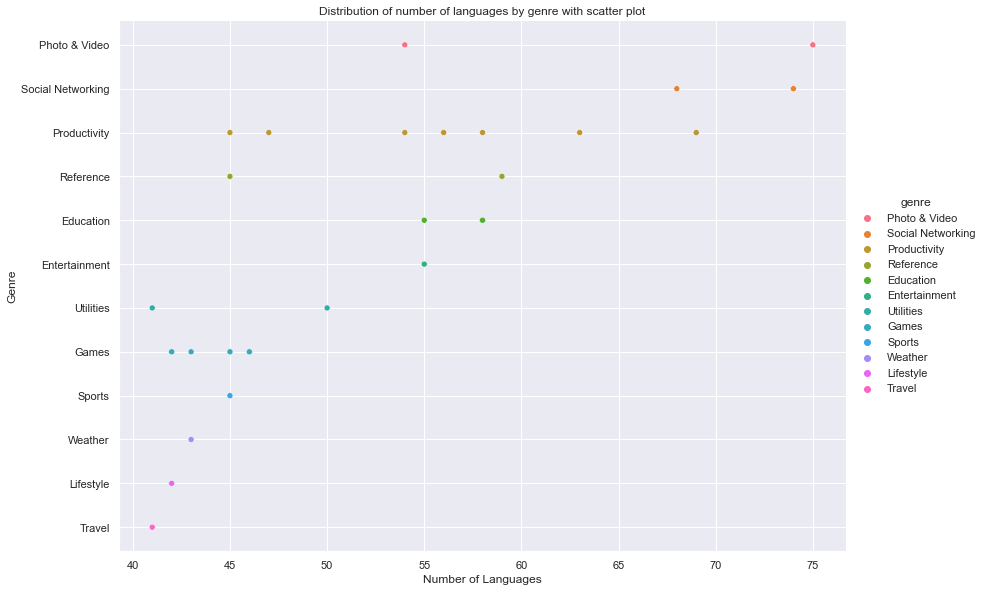

In [56]:
ax = sns.relplot(data=lang_max, #creating the scatter plot
            x='lang_num', 
            y='genre', 
            kind='scatter', 
            hue='genre', 
            height=8, 
            aspect=1.5
           ).set(title='Distribution of number of languages by genre with scatter plot', xlabel="Number of Languages", ylabel="Genre")

In the scatter plot above we can see that genres such as "Productivity", "Photo&Video", "Social Networking" suppot many languages.

## 6. Conclusion

According to my analysis above, we can summarize some points about App Store.

The first is that we divided applications into four groups by their cost. There are free, cheap, medium and expensive categories. The most part of them is free apps, it takes 56.36%.

The second one is about size of applications, to be exact we considered sizes which are more than 2500 Mb. Their total number is 33 out of 7197, and all of them are games. Actually, the size of many applications is around 0 and 0.3 Gb.

In the next point we analyzed genre of apps. Generally, there are 23 types of genre, most of them are games. Then we have found out that the maximum price is 299.99 USD, which belongs to education category. 

The fourth point, rating of applications. Firstly, we found outliers of ratings in each genre, and there is shown from 0 to 3 are the rarest ratings. Rating of applications from medium and expensive price categories is better rather than free and cheap categories.

Finally, about number of languages that are supported by applications. The maximum number is 75 and the minimum is 0 languages. Basically, many languages are maintained by applications, namely from "Productivity", "Photo&Video", "Social Networking" genres.